# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Bilal Salinggih
- James Yu
- Jared Suasin
- Dilraj Sandhu
- Franz Quijano

# Group Members IDs

- A########
- A15598575
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

Is there a correlation between different attributes (danceability, energy, etc.) of a song and it’s music genre? Can we predict trends in attributes (key, tempo, major/minor, energy, etc.) within different music genres?

## Background and Prior Work

*Fill in your background and prior work here* 

Traditionally, music is separated into specific genres. People are familiar with common genres such as country, hip-hop, classical, and beyond. However in the present, as music continues to evolve, genres become more blurred. This makes it more difficult to define the boundaries of where one genre ends and another begins.

To test the boundaries between different genres, we want to uncover trends between different music genres and their attributes. A previous project done on a similar dataset utilizing the Spotify API found a correlation between various attributes of a song and its popularity. Our question is somewhat similar but we want to instead find correlations between various attributes of songs and their respective genres.


References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

Hypothesis: There are certain attributes and subtle differences specific to each genre that will help to determine what genre a specific song is in.

# Dataset(s)

*Fill in your dataset information here*

Since we are attempting to predict attribute trends between genres, we plan on utilizing data from a Spotify API dataset. This dataset provides data on over 228,000 songs across 26 genres. It includes song attributes determined by Spotify’s algorithms including tempo, key, danceability, energy and more. We plan on using this dataset to find correlations between music genres and the different attributes associated with the songs within these genres.

(Copy this information for each dataset)
- Dataset Name: Ultimate Spotify Tracks DB
- Link to the dataset: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db 
- Number of observations: 228,159

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
## YOUR CODE HERE
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
df = pd.read_csv('SpotifyFeatures.csv')
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [3]:
df[df.isnull().any(axis=1)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


There are no rows with null values.

In [4]:
# number of songs per genre. a-capella has the least # of songs
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Blues               9353
Children’s Music    9353
Anime               9353
Alternative         9353
Folk                9299
Hip-Hop             9295
Rock                9272
Classical           9256
Rap                 9232
World               9096
Soul                9089
R&B                 8992
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
A Capella            119
Name: genre, dtype: int64

In [5]:
# tried to get the most commmon artists per genre, need to fix
test = df.groupby(['genre']).agg(lambda x: x.value_counts().index[0])
test

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
A Capella,The Singers Unlimited,Clarity,3w9eYozECT0ANTETwLrMO7,1,0.8300,0.616,239784,0.124,0.000,C,0.114,-19.158,Major,0.0324,91.833,4/4,0.1910
Alternative,Five Finger Death Punch,Animal,5fgb3Md1xjt3mxeBqguiIA,53,0.1140,0.499,60000,0.916,0.000,C,0.108,-5.756,Major,0.0332,100.008,4/4,0.3380
Anime,Five Finger Death Punch,Animal,5fgb3Md1xjt3mxeBqguiIA,53,0.1140,0.499,60000,0.916,0.000,C,0.108,-5.756,Major,0.0332,100.008,4/4,0.3380
Blues,Five Finger Death Punch,Home,5fgb3Md1xjt3mxeBqguiIA,53,0.1140,0.499,60000,0.916,0.000,C,0.108,-5.756,Major,0.0332,100.008,4/4,0.3380
Children’s Music,Five Finger Death Punch,Animal,5fgb3Md1xjt3mxeBqguiIA,53,0.1140,0.499,60000,0.916,0.000,C,0.108,-5.756,Major,0.0332,100.008,4/4,0.3380
Classical,Wolfgang Amadeus Mozart,Ave Maria,1P1XBQHZ6nAqduGHPEx1Dr,0,0.9950,0.286,232000,0.119,0.000,G,0.107,-23.311,Major,0.0412,95.003,4/4,0.0394
Comedy,George Carlin,Intro,5bUkgq3u08jtiQwBszxnjV,12,0.8260,0.570,120000,0.943,0.000,C#,0.954,-10.800,Major,0.9470,82.680,4/4,0.3580
Country,George Strait,I Need You,2H3qnQaszcjAFvGgeylaZQ,38,0.1590,0.626,201867,0.805,0.000,G,0.109,-3.807,Major,0.0289,120.020,4/4,0.4510
Dance,Chris Brown,Sober,5mOPeaSXywGZX3mDflbDsq,52,0.1010,0.706,203000,0.792,0.000,C,0.111,-4.862,Major,0.0311,100.014,4/4,0.5270


In [6]:
# average popularity of songs per genre - indicates how popular each genre is
average_popularity = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
average_popularity

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,,
Pop,66.590667,0.224819,0.640236,220859.160239,0.642208,0.016599,0.179967,-6.495423,0.107963,121.175844,0.481371
Rap,60.533795,0.168080,0.697244,219853.858102,0.650520,0.009317,0.198939,-6.669916,0.188186,121.100808,0.455918
Rock,59.619392,0.196429,0.538292,237003.226920,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113
Hip-Hop,58.423131,0.176172,0.718808,219981.913179,0.643275,0.011200,0.201146,-6.860286,0.205396,120.791039,0.473381
Dance,57.275256,0.152888,0.638191,226264.941846,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754
Indie,54.701561,0.331214,0.566821,224150.373991,0.581002,0.085317,0.168919,-7.915142,0.066724,119.290814,0.428665
Anime,54.659040,0.163175,0.541843,232554.443601,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
Blues,54.659040,0.163175,0.541843,232554.443601,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
Children’s Music,54.659040,0.163175,0.541843,232554.443601,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Start of EDA

Get unique genres in Spotify Database

In [7]:
# Get unique genres from Spotify dataset
genres = df.genre.unique()
#genres = genres.sort()
genres

array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [8]:
# Create subset Dataframe per unique genre
df_Acapella = df.loc[df['genre'] == 'A Capella']
df_Alternative = df.loc[df['genre'] == 'Alternative']
df_Anime = df.loc[df['genre'] == 'Anime']
df_Blues = df.loc[df['genre'] == 'Blues']
df_ChildrensMusic = df.loc[df['genre'] == "Children's Music"]
df_Classical = df.loc[df['genre'] == 'Classical']
df_Comdedy = df.loc[df['genre'] == 'Comedy']
df_Country = df.loc[df['genre'] == 'Country']
df_Dance = df.loc[df['genre'] == 'Dance']
df_Electronic = df.loc[df['genre']=='Electronic']
df_Folk = df.loc[df['genre']=='Folk']
df_HipHop = df.loc[df['genre']=='Hip-Hop']
df_Indie = df.loc[df['genre']=='Indie']
df_Jazz = df.loc[df['genre']=='Jazz']
df_Movie = df.loc[df['genre']=='Movie']
df_Opera = df.loc[df['genre'] == 'Opera']
df_Pop = df.loc[df['genre']=='Pop']
df_RandB = df.loc[df['genre']=='R&B']
df_Rap = df.loc[df['genre']=='Rap']
df_Reggae = df.loc[df['genre']=='Reggae']
df_Reggaeton = df.loc[df['genre']=='Reggaeton']
df_Rock = df.loc[df['genre']=='Rock']
df_Ska= df.loc[df['genre']=='Ska']
df_Soul = df.loc[df['genre']=='Soul']
df_Soundtrack= df.loc[df['genre']=='Soundtrack']
df_World = df.loc[df['genre']=='World']

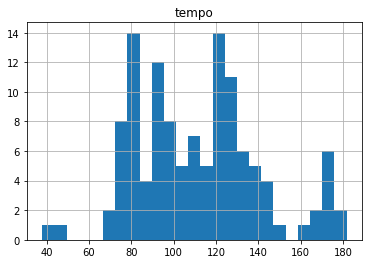

In [9]:
df_Acapella.hist(column='tempo', bins=25);

f1 = plt.gcf()

Bar charts of mean value of attributes be genre

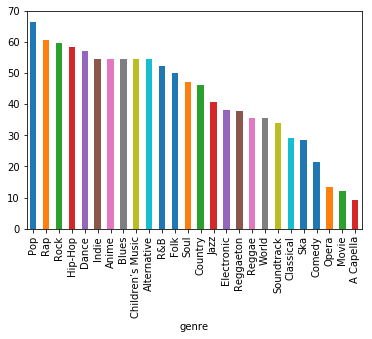

In [10]:
# Plot average popularity across genres
popularity_means = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
popularity_means['genre'] = popularity_means.index
popularity_means = popularity_means['popularity']
popularity_means.plot.bar()


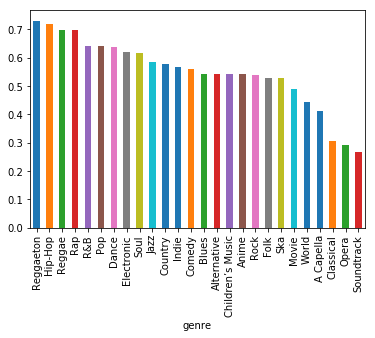

In [11]:
# Plot average danceability across genres
danceability_means = df.groupby(['genre']).mean().sort_values(by='danceability', ascending=False)
danceability_means['genre'] = danceability_means.index
danceability_means = danceability_means['danceability']
danceability_means.plot.bar()

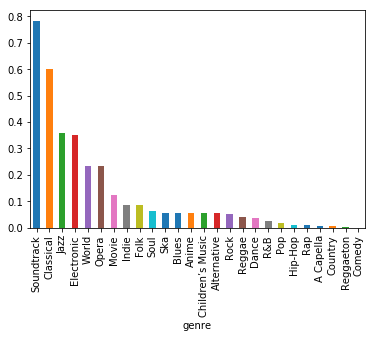

In [12]:
# Plot average instrumentalness across genres
instrumentalness_means = df.groupby(['genre']).mean().sort_values(by='instrumentalness', ascending=False)
instrumentalness_means['genre'] = instrumentalness_means.index
instrumentalness_means = instrumentalness_means['instrumentalness']
instrumentalness_means.plot.bar()

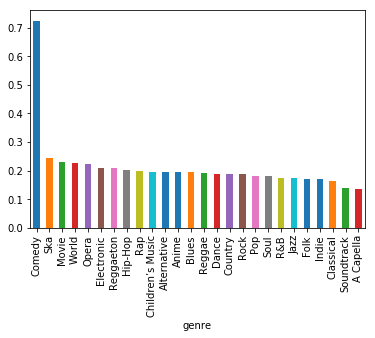

In [13]:
# Plot average liveness across genres
liveness_means = df.groupby(['genre']).mean().sort_values(by='liveness', ascending=False)
liveness_means['genre'] = liveness_means.index
liveness_means = liveness_means['liveness']
liveness_means.plot.bar()

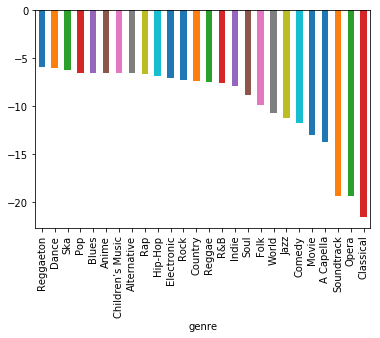

In [14]:
# Plot average loudness across genres
loudness_means = df.groupby(['genre']).mean().sort_values(by='loudness', ascending=False)
loudness_means['genre'] = loudness_means.index
loudness_means = loudness_means['loudness']
loudness_means.plot.bar()

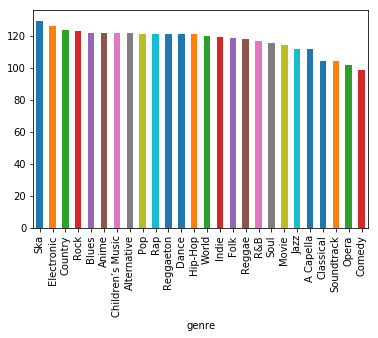

In [15]:
# Plot average tempo across genres
tempo_means = df.groupby(['genre']).mean().sort_values(by='tempo', ascending=False)
tempo_means['genre'] = tempo_means.index
tempo_means = tempo_means['tempo']
tempo_means.plot.bar()

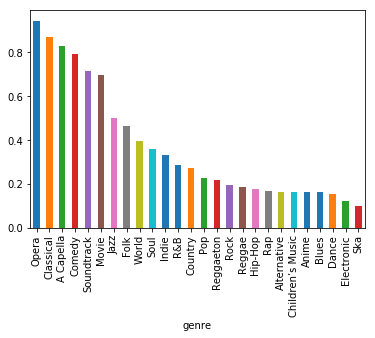

In [16]:
# Plot average acousticness across genres
accoustic_means = df.groupby(['genre']).mean().sort_values(by='acousticness', ascending=False)
accoustic_means['genre'] = accoustic_means.index
acc_means=accoustic_means['acousticness']
acc_means.plot.bar()


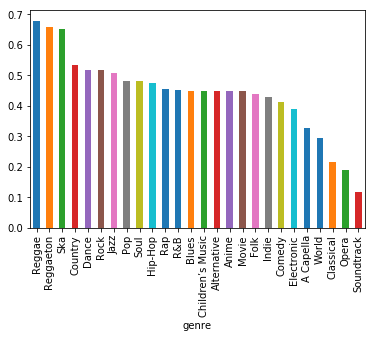

In [17]:
# Plot average valence across genres
valence_means = df.groupby(['genre']).mean().sort_values(by='valence', ascending=False)
valence_means['genre']=valence_means.index
val_means=valence_means['valence']
val_means.plot.bar()

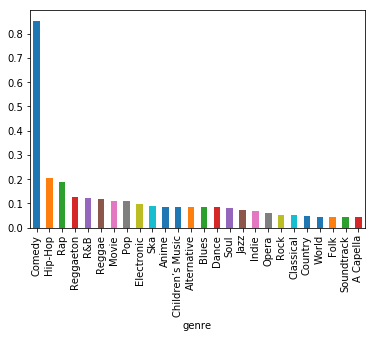

In [18]:
# Plot average speechiness across genres
speechiness_means = df.groupby(['genre']).mean().sort_values(by='speechiness', ascending=False)
speechiness_means['genre']=speechiness_means.index
speech_means=speechiness_means['speechiness']
speech_means.plot.bar()

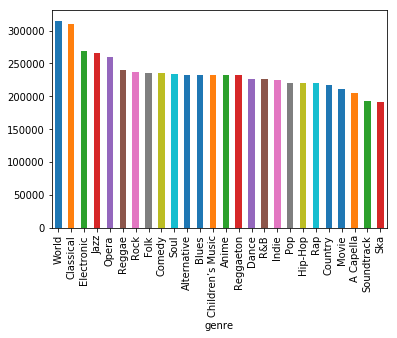

In [19]:
# Plot average duration across genres
duration_means = df.groupby(['genre']).mean().sort_values(by='duration_ms', ascending=False)
duration_means['genre']=duration_means.index
dur_means=duration_means['duration_ms']
dur_means.plot.bar()

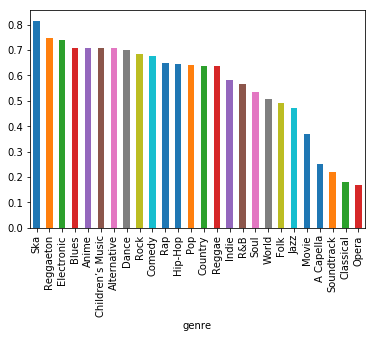

In [20]:
# Plot average energy across genres
energy_means = df.groupby(['genre']).mean().sort_values(by='energy', ascending=False)
energy_means['genre']=energy_means.index
en_means=energy_means['energy']
en_means.plot.bar()

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*